## Support vector machine, radial kernel

Radial kernel support vector machines are a good approach when the data is not *linearly separable*. The idea behind generating non-linear decision boundaries is that we need to do some nonlinear transformations on the features X, which transforms them into a higher dimensional space. We do this non-linear transformation using the *Kernel trick*. 

## Problem description:

The file “dataminesrocks.csv” contains 208 patterns obtained by 1)bouncing sonar signals off a metal cylinder at various angles and under various conditions, and 2) from bouncing sonar signals off rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 features in the range 0.0 to 1.0. Each feature representing the energy within a particular frequency band, integrated over a certain period of time. 

The label associated with each record contains "Rock" or "Mine".

Three trained human subjects were each tested on 100 signals, chosen at random from the set of 208 returns used to create this data set. Their responses ranged between **88% and 97%** correct. However, they may have been using information from the raw sonar signal that is not preserved in the processed data sets presented here.

**Challenge:** Can we design a model that improves the above performance?

References: 

https://datahub.io/machine-learning/sonar#readme

https://www.openml.org/d/40

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing dataset

In [2]:
dataset=pd.read_csv("dataminerocks.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:, -1].values
dataset.head()

,Unnamed: 0,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [3]:
#print(X)

In [4]:
#print(y)

### Label encoding

In [5]:
# Encoding response (label) variable using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Class"]=le.fit_transform(dataset["Class"])
#print(dataset["Class"])

### Create y and X

In [6]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

### Splitting dataset into training and test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=0)

In [8]:
#print(X_train)

### Feature scaling

In [9]:
#It tends to enhance the performance.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc=sc_X
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test) #Not fit_transform to avoid information leakage

In [10]:
#print(X_train)

In [11]:
#print(X_test)

### Creating SVM on training set 

In [12]:
from sklearn.svm import SVC #Radial kernel is 'rbf'
classifier=SVC(kernel="rbf", random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

### Predict test results

In [13]:
classifier.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

In [14]:
print(classifier.predict(X_test))

[1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0]


In [15]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=0)
print('Print of pairs [y_pred, y_test] for visual comparison: \n',np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Print of pairs [y_pred, y_test] for visual comparison: 
 [[1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


### Calculating the confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[26,  0],
       [ 4, 22]])

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(26, 0, 4, 22)

### Plotting the confusion matrix

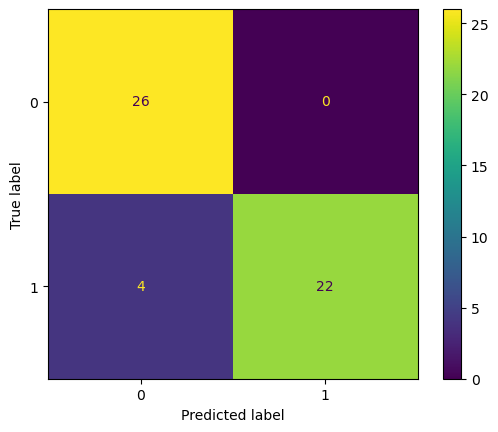

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

### Accuracy

In [19]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}".format(acc))

Accuracy: 92.31


### ROC

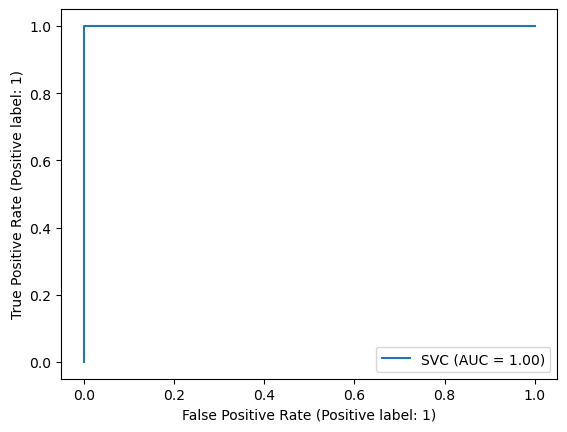

In [20]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

### Precision

In [21]:
from sklearn.metrics import precision_score
pre1=precision_score(y_test, y_pred)*100
print("Precision: {:.2f}".format(pre1))

Precision: 100.00


### Recall

In [22]:
from sklearn.metrics import recall_score
rec=recall_score(y_test, y_pred)*100
print("Recall: {:.2f}".format(rec))

Recall: 84.62


### F1 score

In [23]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred)
print("F1: {:.2f}".format(f1))

F1: 0.92
